<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Project 1: Linear Regression & KNN Regressor</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 <br>
 United States Military Academy, West Point, AY20-2
<h2>=======================================================</h2>

<h2> Weight: <font color='red'>50pts</font</h2>
    
 <h2>Due Date: <font color='red'>Feb. 14th by COB</font</h2>

<hr style="height:3.2px;border:none;color:#333;background-color:#333;" />

<h3> Cadet Name: John Lee</h3>
<br>
<h3>Date: 13 February 2020</h3>

<br>

<font color='red' size='3'> <b>$X$</b> MY DOCUMENTATION IDENTIFIES ALL SOURCES USED AND ASSISTANCE RECEIVED IN THIS ASSIGNMENT
<br>

<b>$\dots \dots$ </b> I DID NOT USE ANY SOURCES OR ASSISTANCE REQUIRING DOCUMENATION IN COMPLETING THIS ASSIGNMENT</font>

<h3> Signature/Initials: JL</h3>

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

<h2>Description of Project</h2>

In this project you will be working with the `incurance` dataset contained in the folder. The `insurance` dataset contains information of different people, and based on this information how much the insurance compay charges them. The ultimate goal is to predict the insurance charges for new people based on the historical information collected about each person. The features that have been collected are: `age, sex, bmi, children, smoker,` and `region`. 

You are provided with two separate sets: `insurance_train` which you will use to train your model and `insurance_test` which you will use to generate the predictions. Once you generate the predictions, you should save the results on an excel file and submit that to me. 

The project will be broken into two main parts: The <b>Analysis</b> and <b> Best Model</b> portions.

<h3>Analysis</h3>

The <b>Analysis</b> portion is worth <b>30pts</b>.

For this portion of the project you will be evaluated on the overall analysis of the dataset.

The rough point breakdown is as follows:

<ul>
<li>A one or two pargraph explaining what the project is about, what are the results, and the methodology: <b>10pts</b></li>

<li>Thoroughly addressing all the questions and completing all the required tasks: <b>10pts </b></li>

<li> Creativity and quality of Python code and explanation of the step-by-step code/work:<b> 10pts</b></li>
</ul>

<h4>Tasks</h4>

<ul>
    <li> Data Preprocessing: Explain how you are handling the missing data, are you scaling the data and why?</li>
    
   <li> Conduct exploratory analysis, and briefly summarize your observations and findings. Exploring your data using a variety of visual tools counts as part of exploratory analysis.</li>
        
   <li> Explain how you handled each of the qualitative features. </li>
   
   <li> What model did you pick and why? At this stage only choose between KNN Regressor and Linear Regression</li>
   
   <li>Explain the type of relationship(linear vs. non-linear) between features and response variable, and how you came to your conclusions. </li>
   
   <li> Obtain a measure of your model's variability and prediction power. Explain your method and results.</li>
   
    
 </ul>

<h3>Best Model</h3>

The <b>Best Model</b> portion is worth <b>20pts</b>.

For this portion you will exclusively be evaluated on the predictive power of your model. In this portion you will be competing with the rest of your peers for the top score. The scores will be, roughly, distributed according to the following scheme:



There are two instances where there may be significant deviations from the above grading scheme:





<table>
  <tr>
    <th>Points</th>
    <th>Criteria</th>

  </tr>
  <tr>
    <td>18-20</td>
    <td>Highest R2 Score</td>
   
  </tr>
  <tr>
    <td>17-19</td>
    <td>.25 StDevs of highest R2 score</td>
   
  </tr>
  <tr>
    <td>15-16</td>
    <td>.5 StDevs of highest R2 score</td>
  
  </tr>
  <tr>
    <td>13-14</td>
    <td>.75 StDevs of highest R2 score</td>
  
  </tr>
  <tr>
    <td>11-12</td>
    <td>1.25 StDevs of highest R2 score</td>

  </tr>
  <tr>
    <td>10</td>
    <td>1.75 StDevs of highest R2 score</td>
   
  </tr>
  <tr>
    <td>9</td>
    <td>2 StDevs of highest R2 score</td>
   
  </tr>
   <tr>
    <td>7-8</td>
    <td> 2+ StDevs of highest R2 score</td>
   
  </tr>
</table>



<ul>
  <li> If a student's model achieves an R2 score that is at least as high as the R2 score achieved by the model build by the instructor, then you will automatically get a $20$</li>
  <li> If the highest R2 score by a student is signigicantly smaller than the R2 score achieved by the model built by the instructor, the insturctor reserves the right to assign a max score that is significantly lower than what is stated in the grading scheme above. In this situation the rest of the scores will also be adjusted accordingly.</li>
 </ul>
 
 <h3>How to Submit?</h3>
 
 All of your work should be done in a single JupyterNotebook. You will submit to me via email a total of two files. One will be the JupyterNotebook which contains your whole work. The second file should be an excel file containing ONLY the predictions of your model on the test set `insurance_test`.

# Analysis

In this project, we seek to predict insurance company charges for a variety of people based on characteristics of those people to include age, Body Mass Index, number of children they have, what region of the U.S they live in, sex, and whether they smoke. Intuitively, it makes sense that many of these features could affect health insurance costs because companies are likely to charge more for health insurance for unhealthy, older people because they are more likely to have issues. Region could have some effect because certain parts of the country are healthier and certain parts are cheaper, but this connection seems further fetched. 
The methodology of the project followed a common analytical process. First, we wrangled the data into a desired form by filling missing values, and converting string variables into numerical values. Next we examined the relationship between our variables through visual plots, finding that only age, BMI, and smoking had roughly linear relationships with charges. Then we split our response variable (charges) off from our predictor variables, and standardized the predictors. Finally, we cross validated linear regression, k nearest neighbor, ridge regression, and spline regression models with our data. We also looped over parameters in these models to find values with the highest R squared. Our final results revealed that while linear, ridge, and spline regression models yielded R squared values around 0.74, KNN yielded a maximum of 0.83, which makes sense due to the questionable linearity of our variables. Thus we selected a KNN(k=11) model to fit to our test data, which was our ultimate solution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

In [2]:
insurance=pd.read_excel('insurance_train.xlsx')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,female,24.130,1,yes,northwest,23887.66270
1,46.0,male,43.890,3,no,southeast,8944.11510
2,46.0,male,19.855,0,no,northwest,7526.70645
3,37.0,female,NaN,2,no,southwest,6311.95200
4,62.0,female,29.920,0,no,southeast,13457.96080


After reading in the data, our first task is to deal with string variables. We define a function to deal with the region variable, and use the get_dummies method to automatically deal with the sex and smoker variables.

In [4]:
def func(x):
    if x == "northwest":
        return 0
    elif x == "northeast":
        return 1
    elif x == "southwest":
        return 2
    else:
        return 3

In [5]:
insurance_new=pd.get_dummies(insurance,columns=['sex','smoker'],drop_first=True)
insurance_new['region'] = insurance_new['region'].apply(func)

In [13]:
insurance_new

,age,bmi,children,region,charges,sex_male,smoker_yes
0,52.0,24.130,1,0,23887.66270,0,1
1,46.0,43.890,3,3,8944.11510,1,0
2,46.0,19.855,0,0,7526.70645,1,0
3,37.0,NaN,2,2,6311.95200,0,0
4,62.0,29.920,0,3,13457.96080,0,0
...,...,...,...,...,...,...,...
998,31.0,36.300,2,2,38711.00000,1,1
999,23.0,33.400,0,2,10795.93733,0,0
1000,28.0,28.880,1,1,4337.73520,0,0
1001,18.0,40.185,0,1,2217.46915,0,0


Now we must deal with missing values. Since missing values appear to be sporadic in our data set and rarely occur accross multiple columns within the same dataset, we do not want to simply get rid of any entry with a missing value. Instead we fill them with the average column values.

In [104]:
insurance_new_fill_orig=insurance_new.fillna(insurance_new.mean())

In [105]:
insurance_new_fill_orig.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,52.0,24.130000,1,0,23887.66270,0,1
1,46.0,43.890000,3,3,8944.11510,1,0
2,46.0,19.855000,0,0,7526.70645,1,0
3,37.0,30.630425,2,2,6311.95200,0,0
4,62.0,29.920000,0,3,13457.96080,0,0


# Data Visualization

In order to model our data, it is first neccessary to visualize and understand it. We plot each explanatory variable against our response variable, observing weak linear relationships only with age and number of children to charges.

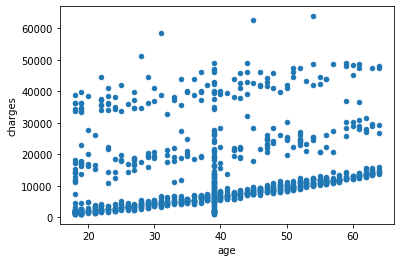

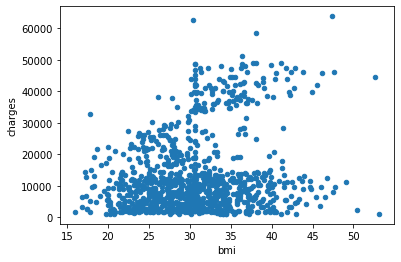

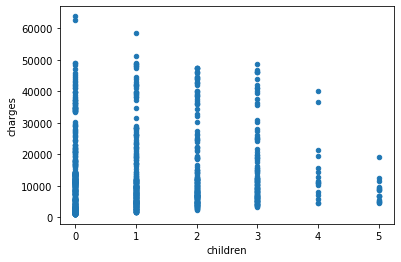

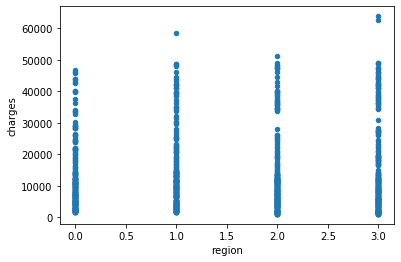

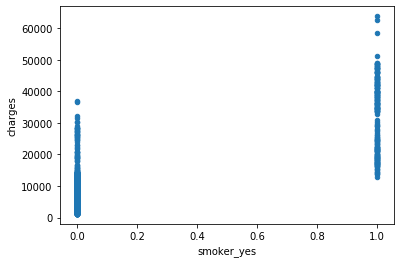

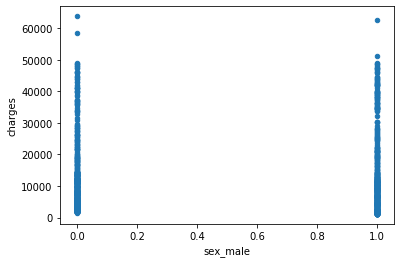

In [67]:

insurance_new_fill_orig.plot.scatter(x='age',y='charges')
insurance_new_fill_orig.plot.scatter(x='bmi',y='charges')
insurance_new_fill_orig.plot.scatter(x='children',y='charges')
insurance_new_fill_orig.plot.scatter(x='region',y='charges')
insurance_new_fill_orig.plot.scatter(x='smoker_yes',y='charges')
insurance_new_fill_orig.plot.scatter(x='sex_male',y='charges')


Based on the plots above, we decide to eliminate region, children, and sex as explanatory variables due to an apparent lack of linearity.

In [120]:
insurance_new1 = insurance_new_fill_orig[['age','bmi','smoker_yes','charges']]
insurance_new1

,age,bmi,smoker_yes,charges
0,52.0,24.130000,1,23887.66270
1,46.0,43.890000,0,8944.11510
2,46.0,19.855000,0,7526.70645
3,37.0,30.630425,0,6311.95200
4,62.0,29.920000,0,13457.96080
...,...,...,...,...
998,31.0,36.300000,1,38711.00000
999,23.0,33.400000,0,10795.93733
1000,28.0,28.880000,0,4337.73520
1001,18.0,40.185000,0,2217.46915


# Data Normalization

We want to scale or normalize our explanatory variables in order to more naturally compare their effects. Using built-in processes, we scale all of our explanatory variables at once.

In [121]:
X=insurance_new1.drop('charges',axis=1)
y=insurance_new1['charges']

In [122]:
X.head()


,age,bmi,smoker_yes
0,52.0,24.130000,1
1,46.0,43.890000,0
2,46.0,19.855000,0
3,37.0,30.630425,0
4,62.0,29.920000,0


In [123]:
y.head()

0    23887.66270
1     8944.11510
2     7526.70645
3     6311.95200
4    13457.96080
Name: charges, dtype: float64

In [124]:
from sklearn.preprocessing import StandardScaler 

In [125]:
scaler=StandardScaler()

In [126]:
scaled = scaler.fit_transform(X)

In [127]:
X_sc=pd.DataFrame(scaled,columns=X.columns,index=X.index)


In [128]:
X_sc.head()

,age,bmi,smoker_yes
0,0.967770,-1.079867e+00,1.949113
1,0.517557,2.202713e+00,-0.513054
2,0.517557,-1.790040e+00,-0.513054
3,-0.157763,-2.950928e-15,-0.513054
4,1.718125,-1.180175e-01,-0.513054


# Model Evaluation

Next we are tasked with fitting and evaluating models to our data. We select linear regression, knn, lasso regression, and ridge regression models as possible options. In order to train and test our model with as little bias as possible, we cross validate each model before calculating average R squared values for comparison.

In [129]:
from sklearn.model_selection import cross_validate, cross_val_score, ShuffleSplit,  KFold, 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

In [145]:
lg=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=11)
lasso=Lasso(alpha=32)
ridge=Ridge(alpha=32)


In [146]:
kf=KFold(n_splits=10,random_state=2,shuffle=True)
ss=ShuffleSplit(n_splits=10,test_size=0.2, random_state=40)

In [ ]:
recall_score(pos_label=1)

In [147]:
cv_lg=cross_validate(lg,X_sc,y,cv=ss,scoring={'r2','neg_mean_squared_error'},return_estimator=True,return_train_score=True)
cv_knn=cross_validate(knn,X_sc,y,cv=ss,scoring={'r2','neg_mean_squared_error'},return_estimator=True,return_train_score=True)

cv_ridge=cross_validate(estimator=ridcv_lasso=cross_validate(estimator=lasso,X=X_sc,y=y,cv=kf, return_estimator=True,
                        scoring={'r2','neg_mean_squared_error'})ge,X=X_sc,y=y,cv=kf, return_estimator=True,
                        scoring={'r2','neg_mean_squared_error'})

In [133]:
cv_lg['test_r2'].mean()

0.7395383007243534

In [134]:
-cv_lg['test_neg_mean_squared_error'].mean()

37701682.99618776

In [148]:
cv_knn['test_r2'].mean()

0.8319945982339206

In [136]:
-cv_knn['test_neg_mean_squared_error'].mean()

24701640.704080347

In [160]:
cv_lasso['test_r2'].mean()

0.7388631146796072

In [138]:
-cv_lasso['test_neg_mean_squared_error'].mean()

37794407.39644979

In [139]:
cv_ridge['test_r2'].mean()

0.7384228033657203

In [140]:
-cv_ridge['test_neg_mean_squared_error'].mean()

37870614.24369868

At first glance, KNN appears to be the best model, at least in terms of explaining variation. 

# Model Tuning

In order to fit the best model possible, we want to make sure we properly assess many values of parameters in our models. We do this by looping over different amounts of 'neighbors' for the knn model and over different alpha values in our ridge and lasso regression models.

In [141]:
param_neighbors = np.arange(2,100,1)

In [142]:
r2_knn = []

for param in param_neighbors:
    knn = KNeighborsRegressor(n_neighbors=param)
    cv_knn=cross_validate(knn,X_sc,y,cv=ss,scoring={'r2'},return_estimator=True,return_train_score=True)
    
    
    r2_knn.append(cv_knn['test_r2'].mean())
    

In [144]:
r2_knn

[0.7642346313949548,
 0.7975588447403257,
 0.8048086525879686,
 0.8131791709163434,
 0.8230367402091294,
 0.8285585310612472,
 0.8305044422443603,
 0.8317428033719416,
 0.8313589430695563,
 0.8319945982339206,
 0.8310748099016351,
 0.8305582236991602,
 0.8302447597469854,
 0.8298275325992492,
 0.8299887521096523,
 0.8297367697102531,
 0.8289780779505721,
 0.828973604413188,
 0.8299256050971333,
 0.8300496656400345,
 0.8294607403601824,
 0.8291473000498704,
 0.8296252896452163,
 0.829675908064547,
 0.8300178877661842,
 0.8291618758399808,
 0.829721364093533,
 0.8289045256021004,
 0.829030247327162,
 0.8282734135301011,
 0.8282209959513926,
 0.828406572187925,
 0.8282751969779479,
 0.8282237693043797,
 0.8278763744719727,
 0.8270197779110247,
 0.8264801717176354,
 0.8258224891690891,
 0.825469729951608,
 0.8249044219010596,
 0.8244265581955721,
 0.8243506642962336,
 0.8238800184052719,
 0.8233711006123844,
 0.822669814174715,
 0.821745042605307,
 0.8210651200888041,
 0.8200999073446642,


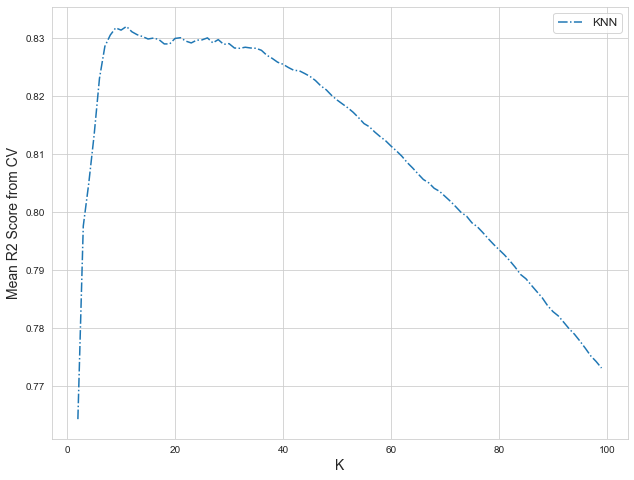

In [143]:
sns.set_style('whitegrid')
fig=plt.figure(figsize=(8,6))

axes=fig.add_axes([0,0,1,1])

axes.plot(param_neighbors,r2_knn, linestyle='-.',lw=1.5,label='KNN')


axes.set_xlabel("K",fontsize=14)
axes.set_ylabel("Mean R2 Score from CV",fontsize=14)

plt.legend(fontsize=12)
plt.show()

The greatest R squared value occurs at k=11 neighbors for the KNN model, with a general decreasing trend thereafter.

In [174]:
param_alpha = np.arange(0.001,50,0.5)

In [175]:
r2_lasso,r2_ridge = [],[]

for param in param_alpha:
    lasso = Lasso(alpha=param)
    ridge = Ridge(alpha = param)
    
    cv_lasso=cross_validate(estimator=lasso,X=X_sc,y=y,cv=kf, return_estimator=True,
                        scoring={'r2'})
    cv_ridge=cross_validate(estimator=ridge,X=X_sc,y=y,cv=kf, return_estimator=True,
                        scoring={'r2'})
   
    
    r2_lasso.append(cv_lasso['test_r2'].mean())
    r2_ridge.append(cv_lasso['test_r2'].mean())

In [180]:
r2_lasso

[0.7388545380261564,
 0.738855109186751,
 0.7388556739564095,
 0.7388562287656357,
 0.7388567736144303,
 0.7388573085027923,
 0.7388578334307226,
 0.7388583483982206,
 0.7388588534052867,
 0.7388593484519206,
 0.7388598335381225,
 0.7388603086638922,
 0.7388607738292298,
 0.7388612290341354,
 0.7388616742786089,
 0.7388621095626504,
 0.7388625348862597,
 0.738862950249437,
 0.7388633556521822,
 0.7388637510944954,
 0.7388641365763765,
 0.7388645120978254,
 0.7388648776588422,
 0.7388652332594271,
 0.7388655788995797,
 0.7388659145793003,
 0.738866240298589,
 0.7388665560574454,
 0.7388668618558698,
 0.7388671576938621,
 0.7388674435714224,
 0.7388677194885507,
 0.7388679854452467,
 0.7388682414415106,
 0.7388684874773427,
 0.7388687235527426,
 0.7388689496677103,
 0.7388691658222459,
 0.7388693720163497,
 0.7388695682500211,
 0.7388697545232605,
 0.7388699308360679,
 0.7388700971884432,
 0.7388702535803864,
 0.7388704000118975,
 0.7388705364829767,
 0.7388706629936235,
 0.7388707795438

In [181]:
r2_ridge

[0.7388545380261564,
 0.738855109186751,
 0.7388556739564095,
 0.7388562287656357,
 0.7388567736144303,
 0.7388573085027923,
 0.7388578334307226,
 0.7388583483982206,
 0.7388588534052867,
 0.7388593484519206,
 0.7388598335381225,
 0.7388603086638922,
 0.7388607738292298,
 0.7388612290341354,
 0.7388616742786089,
 0.7388621095626504,
 0.7388625348862597,
 0.738862950249437,
 0.7388633556521822,
 0.7388637510944954,
 0.7388641365763765,
 0.7388645120978254,
 0.7388648776588422,
 0.7388652332594271,
 0.7388655788995797,
 0.7388659145793003,
 0.738866240298589,
 0.7388665560574454,
 0.7388668618558698,
 0.7388671576938621,
 0.7388674435714224,
 0.7388677194885507,
 0.7388679854452467,
 0.7388682414415106,
 0.7388684874773427,
 0.7388687235527426,
 0.7388689496677103,
 0.7388691658222459,
 0.7388693720163497,
 0.7388695682500211,
 0.7388697545232605,
 0.7388699308360679,
 0.7388700971884432,
 0.7388702535803864,
 0.7388704000118975,
 0.7388705364829767,
 0.7388706629936235,
 0.7388707795438

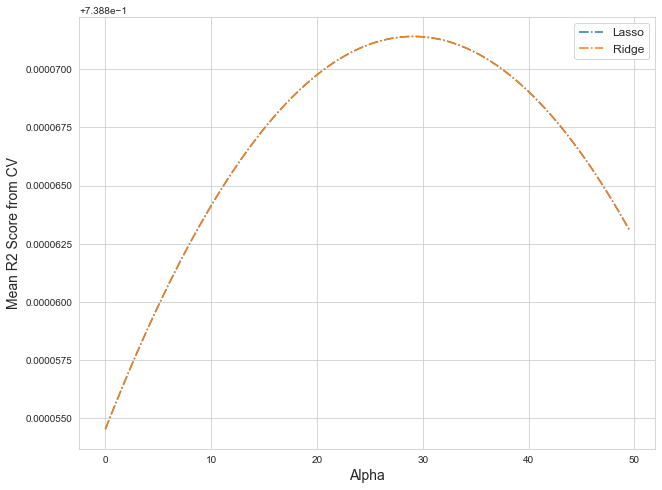

In [182]:
sns.set_style('whitegrid')
fig=plt.figure(figsize=(8,6))

axes=fig.add_axes([0,0,1,1])

axes.plot(param_alpha,r2_lasso, linestyle='-.',lw=1.5,label='Lasso')
axes.plot(param_alpha,r2_ridge, linestyle='-.',lw=1.5,label='Ridge')


axes.set_xlabel("Alpha",fontsize=14)
axes.set_ylabel("Mean R2 Score from CV",fontsize=14)

plt.legend(fontsize=12)
plt.show()

For both the ridge and lasso regression models,we see a general increasing trend in R squared as alpha increases until it reaches a peak at about 28. Howver, none of these R squared values are competitive with that of the KNN model. 

In [56]:
df_lasso=pd.DataFrame(cv_lasso['estimator'][3].coef_,index=X.columns,columns=['Lasso'])
df_lasso

,Lasso
age,3413.719028
bmi,2236.362422
children,661.287356
region,-468.929452
sex_male,-38.548616
smoker_yes,9839.628677


In [57]:
df_ridge=pd.DataFrame(cv_ridge['estimator'][3].coef_,index=X.columns,columns=['Ridge'])
df_ridge

,Ridge
age,3381.670703
bmi,2225.992997
children,665.445693
region,-464.403419
sex_male,-39.967881
smoker_yes,9740.653289


Observing the coefficients for the lasso and ridge regression models reveals they are extremely similar.

# Model Selection

After tuning our models, the result remains the same: KNN is the best model in terms of having the highest R squared value and the lowest MSE. We thus select a KNN(k=11) model to fit our test set to.

To get a sense of the variation in our model, we can observe how our predictions in the training set are distributed against the response variable charges. We see a mostly normal distribution, though with a tail towards the right in charges. This implies a model with some variability, but does not tell us too much about the model performance overall because it is the training set data which our model has already seen. Our R squared 0f 0.83 along with this distribution of residuals imply a decent prediction power, but again we cannot know for sure until we conduct the same analysis of residuals and R squared with our Test set. 

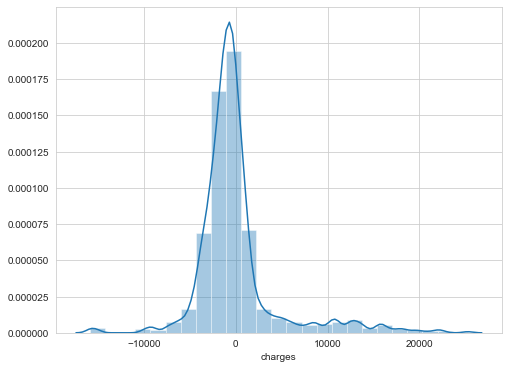

In [161]:
knn.fit(X_sc,y)
knn_pred=knn.predict(X_sc)
plt.figure(figsize=(8,6))
sns.distplot((y-knn_pred), bins=25)

# Test Set Prediction

Now that we have selected a model, it is neccessary to test it on a set of data the model has never seen before. We do this by reading in the separate test set, wrangling it into the same format as our other data, fitting our selected model to our initial data, and then finally making predictions for the new data points based on this model fit. We then export our results into an excel file. 

In [162]:
insurance_test=pd.read_excel('insurance_test.xlsx')

In [163]:
insurance_test_new=pd.get_dummies(insurance_test,columns=['sex','smoker'],drop_first=True)

insurance_test_new['region'] = insurance_test_new['region'].apply(func)
insurance_test_new1 = insurance_test_new[['age','bmi','smoker_yes']]
insurance_test_new1

,age,bmi,smoker_yes
0,59,26.400,0
1,59,31.350,0
2,52,37.400,0
3,46,33.345,0
4,19,28.900,0
...,...,...,...
330,64,22.990,1
331,19,30.590,0
332,61,38.380,0
333,29,21.850,1


In [164]:
scaledTest = scaler.fit_transform(insurance_test_new1)

In [165]:
X_test_sc=pd.DataFrame(scaledTest,columns=insurance_test_new1.columns,index=insurance_test_new1.index)

In [166]:
X_test_sc

,age,bmi,smoker_yes
0,1.398014,-0.708632,-0.490653
1,1.398014,0.132908,-0.490653
2,0.897885,1.161458,-0.490653
3,0.469204,0.472075,-0.490653
4,-1.459864,-0.283612,-0.490653
...,...,...,...
330,1.755249,-1.288360,2.038099
331,-1.459864,0.003702,-0.490653
332,1.540908,1.328066,-0.490653
333,-0.745394,-1.482169,2.038099


In [167]:
model = KNeighborsRegressor(n_neighbors=11)

In [168]:
model.fit(X_sc,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [169]:
pred = model.predict(X_test_sc)

In [170]:
pred


array([12180.26051818, 14736.04476182,  9568.17641818,  9110.08663   ,
        3712.20970082, 16207.69761455,  9150.91143727, 11716.86988182,
       16872.03484091,  6968.16510818,  7843.68644727, 13121.14472909,
       39946.22768636,  6010.33698818,  4345.75747455, 13876.97769545,
       43901.95987091,  9932.26586364, 10937.16886   ,  3119.62592727,
        7278.13522182,  6099.31560636,  5317.56314455, 20959.23313636,
        6294.32261909, 45084.12237273,  5095.68069   ,  3806.85716091,
       41815.83345909, 11737.71498091, 12927.65072   ,  9513.34517455,
       12261.25775909,  8301.37636818,  7774.45136182,  5958.96902636,
        6490.85232182,  3927.16830909, 24576.3297    , 45392.20692727,
       23668.43394091,  6535.84580455,  3404.62854727, 39868.30196909,
       20420.36272455, 11927.34312727, 13140.30235727, 40342.38459091,
       19704.06530182,  3423.08590536,  5962.64695364,  8623.94634   ,
        2441.08920455,  9721.36496818, 11547.04978727,  8309.41488545,
      

In [171]:
predictions = pd.DataFrame(pred,columns = ['charges'])
predictions


,charges
0,12180.260518
1,14736.044762
2,9568.176418
3,9110.086630
4,3712.209701
...,...
330,26077.829691
331,5812.697105
332,13097.409991
333,18694.058985


In [172]:
predictions.to_excel("predictions.xlsx")